# The Erying Equation and Experimental Error
The famous Erying equationis used to create a linear equation that relates the free energy of activation or the free energy in an equilibrium with temperature. Because the enthalpy term is independant of tempoerature and the entropy term involves temperature, we can the separate these effects and determine the enthalpy and the entropy difference in the chemical change between reactants and transtion state or products. But, do you numbers make sense? Unless you are calculating the standard deviations from your plot you may be unaware of a low quality relationship.

## Enzyme Kinetics Example

The data sets for this experiment comes from "Linear Eyring Plots Conceal a Change in the Rate-Limiting Step in an Enzyme Reaction", Teresa F. G. Machado, Tracey M. Gloster, and Rafael G. da Silva, *Biochemistry*, **2018**, *57*, 6757-6761.https://doi.org/10.1021/acs.biochem.8b01099.

Machado et al. were presenting an example where they hypothesized that there was a hidden effect due to changes in the rate-determining step. The plots are very linear so we will use the data at face value. I'm not really convinced that there was a change in rds.

The reaction is the reduction of acetoacetate (3-oxobutanoate) or 3-Oxopentanoate by NADH with the action of *(R)-3-hydroxybutyrate dehydrogenase* (EC 1.1.1.30). Two sources of the enzyme were used. The common bacteria *Acinetobacter baumannii* and the cold-favouring (psychrophilic) bacteria *Psychrobacter arcticus*. The Michaelis-Menten turnover number ($k_{cat}$, the first-order rate constant of the enzyme-NADH-substrate complex to give product) was measured at temperatures for $-10$ to $67\ ^\circ C$. The Eyring plot for the *P. arcticus* curves slightly as temperature increases. The enzyme comes from an organicm adapted got cold conditions. The plot for the *A. baumannii* enzyme were linear so I will only use that data in this example.


## The Eyring Equation

The Erying equation is...

$$ k = \frac{\kappa k_B}{h} T e^{-\Delta G^\ddagger}$$

...and we can include that $\Delta G^\ddagger = \Delta H^\ddagger - T \Delta S^\ddagger$ and we obtain...

$$ k = \frac{\kappa k_B}{h} T e^{\frac{-\Delta H^\ddagger}{RT}}e^{\frac{\Delta S^\ddagger}{R}}$$

This can be written in a linear form...

$$\ln \frac{k}{T} = \frac{-\Delta H^\ddagger}{R}\cdot\frac{1}{T} + \ln\frac{\kappa k_B}{h} + \frac{\Delta S^\ddagger}{R}$$

...where $k$ is the observed rate constant and $T$ is the absolute temperature.

From this, we can find $\Delta H^\ddagger$ and $\Delta S^\ddagger$ from the slope and intercept by plotting $\ln \frac{k}{T}$ vs. $\frac{1}{T}$

## Choose Your Data

In the code below we call the packages and define clobal variables. One important variable is the name of the data file. The following data files are available.

> Eryingdata1.csv - *AbHBDH* with 3-oxobutyrate <br>
Eryingdata2.csv - *AbHBDH* with 3-oxopentanoate

change the datafile variable to repeat this notebook with the other data set. There are several more data sets from two other recent contributions that are described at the end of this document. Try them and see what the effect of more or less data has on you error for calculating the parameters of the Eyring plot

In [2]:
### Setup packagaes and global variables

from scipy.optimize import curve_fit     ## tool for curve fitting
import scipy                             ## tools for science
import numpy as np                       ## import the tools of NumPy but use a shorter name
import pandas as pd                      ## import tools for data handling
from matplotlib import pyplot as plt     ## tools for plotting

import uncertainties as un               ## tool set for handling numbers with uncertainties
from uncertainties import unumpy as unp  ## a replacement for numpy that uses uncertainty values
from uncertainties import umath as um    ## a replacement for math that uses uncertainty values

github_location = "./"                   ## Use either local folde or github folder. use github locations for Colab
github_location_styles = "./"
#github_location = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/data/"
#github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"

datafile = "data/EryingData1.csv"   # change this file for new data
#datafile = "data/EryingData2.csv"  
#datafile = "data/EryingDataC1.csv"  # see bottom of notebook for more info


In [3]:
### Inspect the data file

with open(datafile, 'r') as file:
    file_content = file.read()  # Read the content of the file
    print(file_content)         # Print the content

# from "Linear Eyring Plots Conceal a Change in the Rate-Limiting Step in an Enzyme Reaction"
# Teresa F. G. Machado, Tracey M. Gloster, and Rafael G. da Silva
# Biochemistry 2018 57 (49), 6757-6761
# https://doi.org/10.1021/acs.biochem.8b01099
#
# data for Figure 1: AbHBDH with Acetoacetate 
"TEMP(K)", "Kcat(s-1)", "Error(s-1)"
283,     3.4,      0.1  
288,     5.3,      0.2  
293,     7.6,      0.2   
298,     11.7,     0.3 
303,     15.2,     0.1 
308,     21.3,     0.9 
313,     27.8,     0.9 
318,     39,       3 
323,     52,       4 
325,     61,       2 
328,     69,       3 
330,     79,       7 


In [4]:
### Read in data set

df = pd.read_csv(datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
display(df.head())

,TEMP(K),Kcat(s-1),Error(s-1)
0,283,3.4,0.1
1,288,5.3,0.2
2,293,7.6,0.2
3,298,11.7,0.3
4,303,15.2,0.1


In [5]:
### Calculate values for Eyring Plot

df["k_unc"] = unp.uarray(df["Kcat(s-1)"],df["Error(s-1)"])   # Combine value and stdev to make Uncertainties values
df["1/T"] = 1/df["TEMP(K)"]                                  # get 1/T for x-axis
df["ln(k)/T"] = unp.log(df["k_unc"]/df["TEMP(K)"])           # get ln(k/T) for y-axis with error propagation

display(df.head())


,TEMP(K),Kcat(s-1),Error(s-1),k_unc,1/T,ln(k)/T
0,283,3.4,0.1,3.40+/-0.10,0.003534,-4.422+/-0.029
1,288,5.3,0.2,5.30+/-0.20,0.003472,-4.00+/-0.04
2,293,7.6,0.2,7.60+/-0.20,0.003413,-3.652+/-0.026
3,298,11.7,0.3,11.70+/-0.30,0.003356,-3.238+/-0.026
4,303,15.2,0.1,15.20+/-0.10,0.003300,-2.992+/-0.007


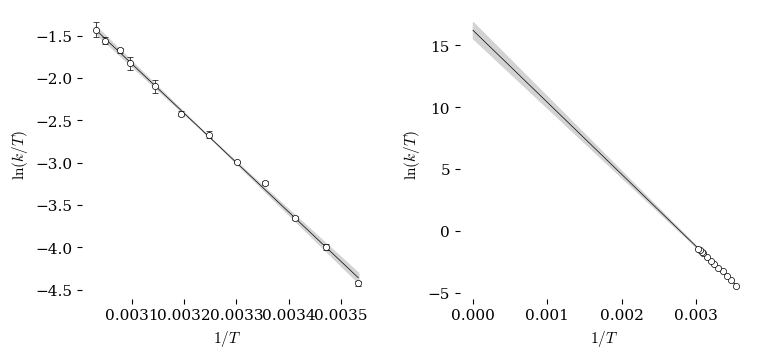

The slope is -5826.55 +/- 66.47
The intercept is 16.229 +/- 0.2158
The RSQ is 0.999


In [21]:
### Choose our x and y values.

x = df["1/T"]
y = unp.nominal_values(df["ln(k)/T"])
y_err = unp.std_devs(df["ln(k)/T"])

nstd = 3.     # Number of sigmas for confidence interval 1 = 68%, 2 = 95%, 3 = 99.7% confidence

### Curve fit to linear function

def linear(x, slope, intercept):
    return slope * x + intercept

popt,pcov = curve_fit(linear, x, y, 
          #             sigma = y_err, absolute_sigma=False  # Include st_devs for y data in calculations
                     )

[slope,intercept] = popt
perr = np.sqrt(np.diag(pcov))

### Create figure for plot
plt.rcdefaults()

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [8,4]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=size)  

### Create plot #0 for plot

# Settings for plot
ax[0].set(
#          title = Title,       
          ylabel=r"$\ln (k / T)$", 
          xlabel=r"$1/T$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
#          ylim=[None,None]
       )

# Plot the data
#ax[0].scatter(x, y, marker = "o", s = 70, color = "white", alpha = 1.0, zorder = 1)
ax[0].scatter(x, y, marker = "o", s = 20, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3) 

# Add error bars
ax[0].errorbar(x, y, yerr=y_err, xerr=None, fmt="None", 
               ecolor="black", elinewidth=0.5, 
               capsize=2, capthick=0.5, zorder=2)

# Calculate the line from curve fit parameters
x_fit = np.linspace(np.min(x), np.max(x), 100)
#x_fit = np.linspace(0, np.max(x), 100)
y_fit = linear(x_fit,slope,intercept)

# Plot the curve fit line
ax[0].plot(x_fit, y_fit, 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 2)

# prepare confidence level curves
popt_plus = popt + nstd * perr    # add error to parameters
popt_minus = popt - nstd * perr   # subtract error from paramneters

# steeper slope will result in higher intercept and vice versa
confidence_line_1 = linear(x=x_fit, slope=popt_plus[0], intercept=popt_minus[1])
confidence_line_2 = linear(x=x_fit, slope=popt_minus[0], intercept=popt_plus[1])

# Plot confidence interval
ax[0].fill_between(x_fit, confidence_line_1, confidence_line_2, 
                   color="lightgray", alpha=1, zorder = 0,
                   label="confidence interval")

### Create plot #1 for plot

# Settings for plot
ax[1].set(
#          title = Title,       
          ylabel=r"$\ln (k / T)$", 
          xlabel=r"$1/T$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
#          ylim=[None,None]
       )

# Plot the data
#ax[1].scatter(x, y, marker = "o", s = 70, color = "white", zorder = 1)
ax[1].scatter(x, y, marker = "o", s = 20, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3) 

# Add error bars
#ax[1].errorbar(x, y, yerr=y_err, xerr=None, fmt="None", ecolor="black", elinewidth=0.5, capsize=2, capthick=0.5, zorder=1)

# Calculate the line from curve fit parameters
x_fit = np.linspace(0, np.max(x), 100)
y_fit = linear(x_fit,slope,intercept)

# Plot the curve fit line
ax[1].plot(x_fit, y_fit, marker = None, 
           color = "black", linewidth=0.5, zorder = 2)

# prepare confidence level curves
popt_plus = popt + nstd * perr    # add error to parameters
popt_minus = popt - nstd * perr   # subtract error from paramneters

# steeper slope will result in higher intercept and vice versa
confidence_line_1 = linear(x=x_fit, slope=popt_plus[0], intercept=popt_minus[1])
confidence_line_2 = linear(x=x_fit, slope=popt_minus[0], intercept=popt_plus[1])

# Plot confidence interval
ax[1].fill_between(x_fit, confidence_line_1, confidence_line_2, 
                   color = "lightgray", alpha=1, zorder = 0,
                   label="confidence interval")

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("Etring.pdf")
plt.show()

print(f"The slope is {slope:0.2f} +/- {perr[0]:0.2f}")
print(f"The intercept is {intercept:0.3f} +/- {perr[1]:0.4f}")

r, p = scipy.stats.pearsonr(x, y)
rsq = r ** 2

print(f"The RSQ is {rsq:0.3f}")


## calculate Activation Parameters

We now have values for the slope and intercept. We can use the definitions of the slope and intercept in the Erying equation to calculate the thermodynamic parameters for the transition state.

$$\text{slope} = \frac{-\Delta H^\ddagger}{R}$$

$$ \Delta H^\ddagger = -\text{slope}\cdot R$$

and

$$\text{intercept} = \ln\frac{\kappa k_B}{h} + \frac{\Delta S^\ddagger}{R}$$


$$\Delta S^\ddagger =\left( \text{intercept} - \ln\frac{\kappa k_B}{h}\right) R $$

$\kappa$ is the transmission coefficient and is assumed to be unity in transition state theory

$k_B$ is the Boltzman constant: $1.380649\times10^{23} \ J\, K^{-1}$

$R$ is the gas constant: $8.314462618 \ J\, mol^{-1} K^{-1}$ 

$h$ is the Planck constant: $6.62607015\times10^{-34}\ J\, s$

In [7]:
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

slope_unc = un.ufloat(slope, perr[0])
dH = -slope_unc * R
print(f"The change in enthalpy is {dH/1000:0.2f} kJ/mole")

intercept_unc = un.ufloat(intercept, perr[1])
dS = (intercept_unc - np.log(kb/h))*R
print(f"The change in enthalpy is {dS:0.2f} J/mole.K")


The change in enthalpy is 48.44+/-0.55 kJ/mole
The change in enthalpy is -62.61+/-1.79 J/mole.K


# Exploring Other Ideas

Ignore below. I was fooling around trying to understand how the Seaborn plotting package calculated confidence intervales using the regplot function.

<Axes: xlabel='1/T'>

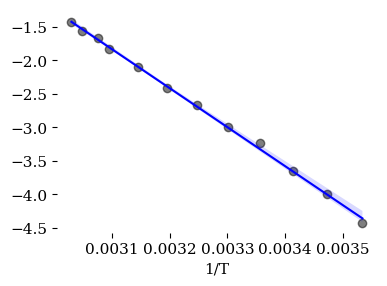

In [8]:
import seaborn as sns

sns.regplot(x = x, y = y,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "blue"},
            ci = 99) # 99% level

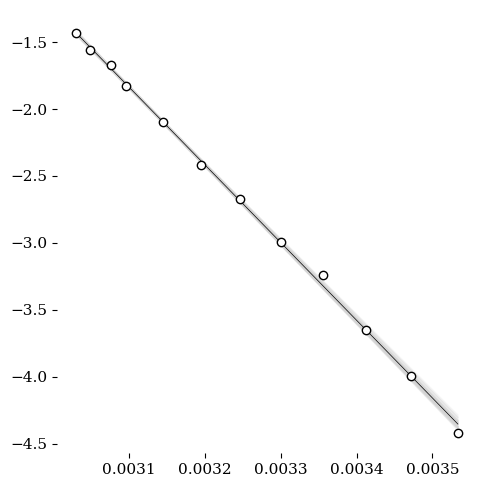

In [9]:
## Code found in https://stats.stackexchange.com/questions/183230/bootstrapping-confidence-interval-from-a-regression-prediction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

# Create toy data 
#x = np.linspace(0, 10, 20)
#y = x + (np.random.rand(len(x)) * 10)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

n_estimators = 50
model = BaggingRegressor(LinearRegression(), 
                         n_estimators=n_estimators,
                         bootstrap=True)

model.fit(X, y)

plt.figure(figsize=(5,5))

# Accessing each base_estimator (already fitted)
for m in model.estimators_:
    plt.plot(x, m.predict(X), color='lightgrey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='white', edgecolor="black", zorder=5)

# "Bagging model" prediction
plt.plot(x, model.predict(X), color='black', linewidth=0.5, zorder=4)

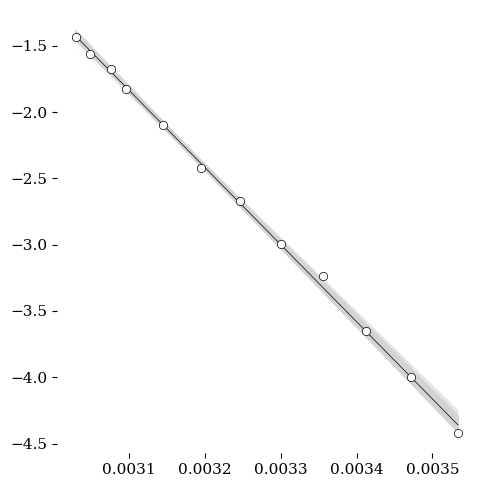

In [10]:
## code found in https://stats.stackexchange.com/questions/183230/bootstrapping-confidence-interval-from-a-regression-prediction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create toy data 
#x = np.linspace(0, 10, 20)
#y = x + (np.random.rand(len(x)) * 10)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

plt.figure(figsize=(5,5))
for i in range(0, 500):
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(x, lr.predict(X), color='lightgrey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='white', edgecolor = "black", linewidth = 0.5, zorder=5)

lr = LinearRegression()
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='black', linewidth=0.5, zorder=4)

-5628.778275545378
-5939.913739553715
-5821.324736655975
16.590928885106067
15.604856688648562
16.21126419874257


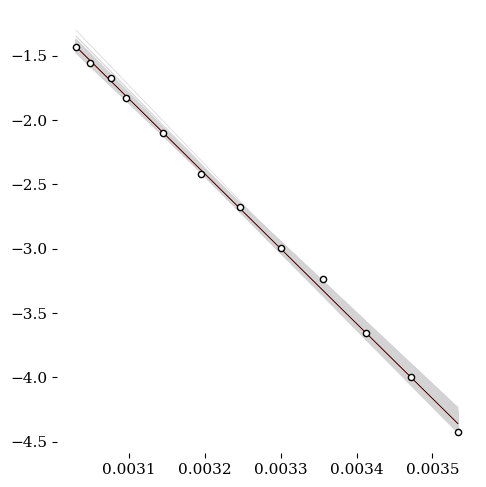

In [11]:
## THIS IS MY VERSION
## Adapted from code found in https://stats.stackexchange.com/questions/183230/bootstrapping-confidence-interval-from-a-regression-prediction

xa = np.array(x)    # I plan to use some numpy functions on these data series so converts from
y = np.array(y)    # Pandas series to NumPy array

def linear(x, slope, intercept):
    return slope * x + intercept

plt.figure(figsize=(5,5))


slope_list = []
intercept_list = []
for i in range(0, 2000):
    xa = np.array(x)    # I plan to use some numpy functions on these data series so converts from

    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = xa[sample_index]
    y_samples = y[sample_index] 
    y_err_samples = y_err[sample_index]

    popt,pcov = curve_fit(linear, X_samples, y_samples, 
              #         sigma = y_err_samples, absolute_sigma=False  # Include st_devs for y data in calculations
                     )
    [slope,intercept] = popt
    slope_list.append(slope)
    intercept_list.append(intercept)
    
#    xa = np.insert(xa,0,0)   # insert zero into first position of x data so line fit starts from zero

    plt.plot(xa, linear(xa, slope, intercept), color='lightgrey', linewidth = 0.5, alpha=1, zorder=1)
    
xa = np.array(x)    # I plan to use some numpy functions on these data series so converts from

popt,pcov = curve_fit(linear, xa, y, 
           #            sigma = y_err, absolute_sigma=False  # Include st_devs for y data in calculations
                     )

[slope,intercept] = popt
perr = np.sqrt(np.diag(pcov))


plt.scatter(x,y, marker='o', color='white', s = 20, edgecolor='black', zorder=5)


conf = 95
low_p = 50 - conf/2
high_p = 50 + conf/2

top_slope = np.percentile(slope_list, high_p)
bot_slope = np.percentile(slope_list, low_p)
median_slope = np.percentile(slope_list, 50)

print(top_slope)
print(bot_slope)
print(median_slope)

top_intercept = np.percentile(intercept_list, high_p)
bot_intercept = np.percentile(intercept_list, low_p)
median_intercept = np.percentile(intercept_list, 50)

print(top_intercept)
print(bot_intercept)
print(median_intercept)

#xa = np.insert(xa,0,0)   # insert zero into first position of x data so line fit starts from zero
plt.plot(xa, linear(xa, slope, intercept), color='red', linewidth = 0.5, zorder=4)
plt.plot(xa, linear(xa, median_slope, median_intercept), color='black', linewidth = 0.5, zorder=4)


In [12]:
Temp = 325
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

slope_unc = un.ufloat(slope, perr[0])
dH = -slope_unc * R
print(f"The change in enthalpy is {dH/1000:0.2f} kJ/mole")

intercept_unc = un.ufloat(intercept, perr[1])
dS = (intercept_unc - np.log(kb/h))*R
print(f"The change in enthalpy is {dS:0.2f} J/mole.K")

lnkT = -dH/R * 1/Temp + np.log(kappa*kb/h) + dS/R
kobs=unp.exp(lnkT)*Temp

print(f"calculate k at T={Temp} K is {kobs:0.2f}")

#kobs = (kappa * kb * Temp / h) * unp.exp(dS/R) * unp.exp(-dH/(R*Temp))
#print(f"calculate k at T={Temp} K is {kobs:0.2f}")


The change in enthalpy is 48.44+/-0.55 kJ/mole
The change in enthalpy is -62.61+/-1.79 J/mole.K
calculate k at T=325 K is 59.46+/-17.68


The Erying equation is...

$$\ln \frac{k}{T} = \frac{-\Delta H^\ddagger}{R}\cdot\frac{1}{T} + \ln\frac{\kappa k_B}{h} + \frac{\Delta S^\ddagger}{R}$$

